# MNIST Dataset

Essa base possui imagem dos digitos de 0 até 9.

In [ ]:
!pip install yellowbrick==1.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [3]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

pixel_values, targets = data
targets = targets.astype(int)

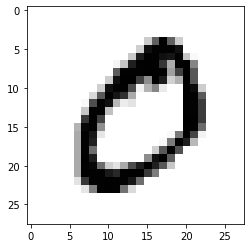

In [4]:
single_digit = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_digit, cmap='binary');

In [5]:
pixel_sample = pixel_values[:3000, :].copy()
targets_sample = targets[:3000].copy()

# PCA

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


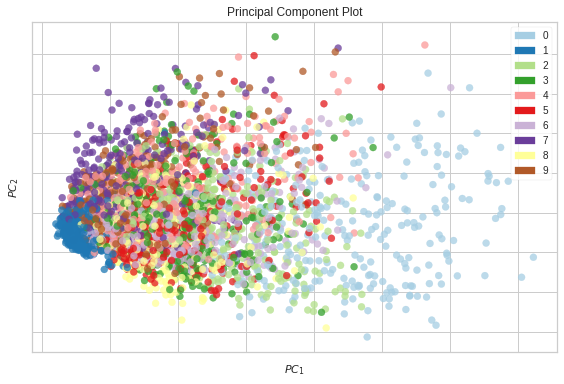

In [6]:
from yellowbrick.features import PCA
from yellowbrick.style import set_palette
set_palette('paired')

visualizer = PCA(scale=True, projection=2, classes=np.unique(targets_sample))
visualizer.fit_transform(pixel_sample, targets_sample)
visualizer.show();

Apesar do PCA não ter distinguido bem os grupos, parece que esses dados são segmentados, como de fato são. Vamos tentar uma outra técnica de redução de dimensionalidade, conhecida como `TSNE`.

# TSNE

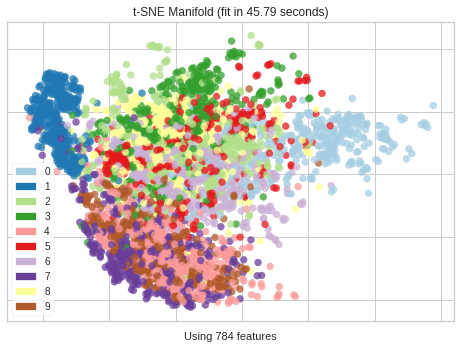

In [7]:
from yellowbrick.features import Manifold

visualizer = Manifold(manifold='tsne', classes=np.unique(targets_sample))
visualizer.fit_transform(pixel_sample, targets_sample)
visualizer.show();

# UMAP

Outra técnicas de redução de dimensionalidade bem recente é o `UMAP`. Ela se destaca por ser bem rápida de ser executada e mostrar ótimos resultados!

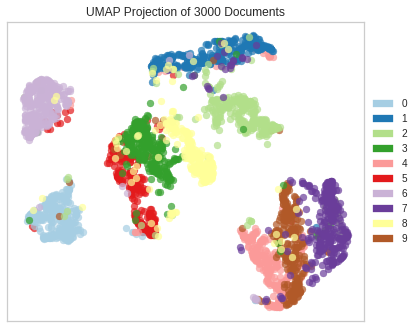

In [15]:
from yellowbrick.text import UMAPVisualizer

umap = UMAPVisualizer()
umap.fit(pixel_sample, targets_sample);
umap.show();

**UMAP** parece ter um melhor resultado das três técnicas no dataset `MNIST`.

# Aplicando o UMAP na base de flores `Iris`

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

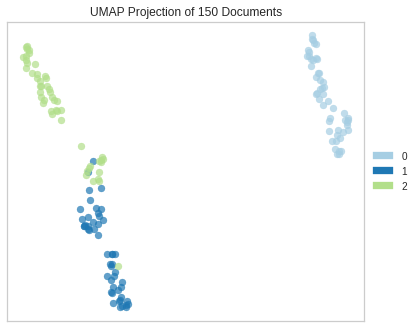

In [12]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

X = df.drop('target', axis=1).copy()
y = df['target'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

umap = UMAPVisualizer()
umap.fit(X, y);
umap.show();